<div id="instructions" style="border-radius: 5px; background-color:#f5f5f5;" >
<h1>Instructions</h1>
<p>Look for the <b>3 Your Turn</b> sections to complete the code and/or answer questions.<p>
</div>

# Lesson 3 Introduction to Probability Distributions

This notebook introduces you to the basics of probability distributions. First, we will explore some discrete distributions, then we will examine continuous distributions.

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/Bernoulli.jpg" alt="Bernoulli picture" style="height: 200px; float: left; margin-right: 10px; "><img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/Ars.jpg" alt="Ars book cover" style="float: right; margin-left: 5px; height: 200px;">
Jacob Bernoulli (1654 - 1705) was a Swiss mathematician who pioneered many subjects in mathematics, including the mathematical theory of probability. 

Bernoulli died before he could publish his book, *Ars Conjectandi*, which set forth theories of probabilities. This included theory of probabilities from trails with discrete results. His incomplete book was eventually published posthumously in 1713.


## Discrete Distributions

Discrete distributions are used to model the probability of events with discrete outcomes or states. Discrete distributions have a countable number of possible outcomes. The distribution measures the probability of each of these outcomes. We therefore call the distribution function the **Probability Mass Function**.

The basic properties of discrete distributions are:

- The sum of the probabilities of all possible events must equal 1.
- The probability of an event is equal to the value of distribution at that point.
- All probabilities are strictly in the range 0-1.

### Bernoulli Distributions

Bernoulli distributions model the outcomes of trials or experiments with binary outcomes. For example, the flip of a coin can only result in two possible end states, $\{ heads, tails \}$. 

For an event with a binary outcome, ${0,1}$ with probability $p$ of state 1, we can write the probability mass function for the Bernoulli distribution as:

$$
P(x\ |\ p) = \bigg\{ 
\begin{matrix}
p\ if\ x = 1\\
(p - 1)\ if\ x = 0
\end{matrix}\\
or\\
P(x\ |\ p) = p^x(1 - p)^{(1-x)}\ x \in {0, 1}
$$

Some other basic properties of the Bernoulli distribution are:

$$
Mean = p\\
Varience = p(1-p)
$$

Let's explore the Bernoulli distribution. The code in the cell below computes the outcome of $1000$ Bernoulli trials with $p = 0.75$. The theoretical and empirical mean and variance for these trials is then displayed. Execute this code and examine the results. How close are the empirical mean and variance to the theoretical mean and variance?

In [2]:
from __future__ import division 

import numpy
import pandas
import scipy
import scipy.stats
from matplotlib import pyplot
import seaborn

# Configure default plot style.
seaborn.set_palette('muted')
seaborn.set_style('ticks')
%matplotlib inline

In [3]:
# Bernoulli (Binomial with n = 1)
p = 0.75
n = 1000

# Compute `n` random draws
bern_samples = numpy.random.binomial(1, p, n)
bern_samples.shape

(1000,)

In [4]:
bern_sample_mean = bern_samples.sum() / bern_samples.size
# Note: there's also a built-in for mean: `bern_samples.mean()`

# The expected mean is `p`
print('p = %.3f    Sample mean = %.3f' % (p, bern_sample_mean))

p = 0.750    Sample mean = 0.760


In [5]:
# Compute the variance of the samples
bern_sample_var = bern_sample_mean * (1 - bern_sample_mean)
# Note: there's also a built-in for variance: `bern_samples.var()`

# Compute the expected variance
bern_var = p * (1 - p)

print('Bernoulli variance = %.3f   Sample variance = %.3f' % (bern_var, bern_sample_var))

Bernoulli variance = 0.188   Sample variance = 0.182


## Your Turn 1
With $p = 0.75$ we expect that 75% of the trials with end with a value of 1. Verify this expectation by plotting a simple histogram of the variable `bern_samples` you just computed. Note that the code in the cell allows you to size the figure.

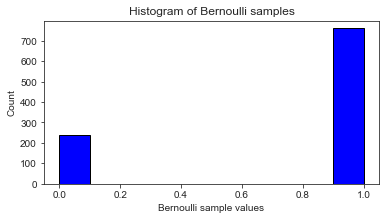

In [6]:
pyplot.figure(figsize=(6, 3))
pyplot.hist(bern_samples, color='blue', edgecolor='black')
pyplot.xlabel('Bernoulli sample values')
pyplot.ylabel('Count')
_ = pyplot.title('Histogram of Bernoulli samples')

### Binomial Distribution

We have just computed the outcome of a number of independent Bernoulli trials. The product of multiple Bernoulli trials is a binomial distribution. For example, if we perform a number of Bernoulli trials ($\{success, fail \}$) on a sample (with replacement) of a population the number of successes will be a binomial distribution. 

The probability of $N$ Bernoulli trials with probability of positive outcome $p$ is written as:

$$P(x\ |\ N, p) = \binom{N}{x} p^x(1 - p)^{(N-x)}$$

Notice that the product includes the term $\binom{N}{x}$ since we must account for all possible combinations of outcomes from the trials. 

Let's try computing several binomial distributions, with probability of success $p = 0.75$, and $N = \{5, 25, 75 \}$. The code in the cell below computes $1000$ realizations of the binomial distribution for each value of $N$. The theoretical and sample means and variances are computed and printed for each case. Execute this code and examine the results. Are the sample means and variances close to the theoretical values?

In [7]:
# Binomial sampling
trials = numpy.array([5, 25, 75])
binom_samples = [numpy.random.binomial(t, p, n) for t in trials]

binom_sample_means = [samples.mean() for samples in binom_samples]
binom_means = trials * p
pandas.DataFrame({
    'BinomialMean': binom_means,
    'SampleMean': binom_sample_means,
})

,BinomialMean,SampleMean
0,3.75,3.725
1,18.75,18.817
2,56.25,56.195


In [8]:
binom_sample_vars = [samples.var() for samples in binom_samples]
binom_vars = trials * p * (1 - p)
pandas.DataFrame({
    'BinomialVariance': binom_vars,
    'SampleVariance': binom_sample_vars
})

,BinomialVariance,SampleVariance
0,0.9375,0.941375
1,4.6875,4.565511
2,14.0625,14.838975


## Your Turn 2
In the cell below, create and execute the code to plot the simple histograms of the three binomial distributions in the `binom_samples` list. Do these distributions appear as you expect? 

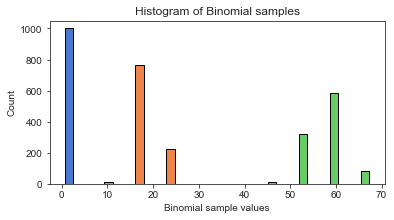

In [13]:
pyplot.figure(figsize=(6, 3))
pyplot.hist(binom_samples, edgecolor='black')
pyplot.xlabel('Binomial sample values')
pyplot.ylabel('Count')
_ = pyplot.title('Histogram of Binomial samples')


Notice that while the outcome of each Bernoulli trial is a discrete binary result, the product of multiple trials can take many discrete values. In fact, as $N$ becomes large the binomial distribution starts to look like a continuous distribution. In fact, the binomial distribution converges to the continuous normal distribution as $N \rightarrow \infty$. 

The code in the cell below computes the histogram of of the binomial distribution and then the density of the equivalent normal distribution. This done for the three sets of mean and variance previously computed with probability of success $p = 0.75$, and $N = \{5, 25, 75 \}$. Execute this code and examine the results. How does the binomial distribution converge to the normal distribution as $N$ increases?

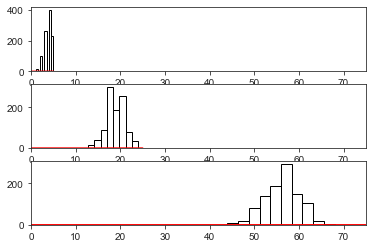

In [9]:
for i in range(len(trials)):
  pyplot.subplot(len(trials), 1, i+1) # Create one plot per row (one for each trial)
  resolution = 1000  # How many points to sample from the PDF of the normal distribution
  x_norm = numpy.linspace(0, trials[i], resolution)
  y_norm = scipy.stats.norm.pdf(
      x_norm, # Where we want to evaluate the PDF
      loc=binom_means[i], # The mean of the distribution
      scale=numpy.sqrt(binom_vars[i])) # The std deviation of the distribution

  # Plot the samples
  pyplot.hist(binom_samples[i], color='white', edgecolor='black')
  # Plot the normal distribution PDF
  pyplot.plot(x_norm, y_norm, color='red')
  pyplot.xlim(0, trials[-1])

### Poisson Distribution

A common problem is modeling of the count of events occurring within the some period of time. The Poisson distribution models the occurrence of events in a fixed interval of time. We say that the Poisson distribution models the probability of x **arrivals** within the time period. 

In mathematical terms we write the Poisson distribution as:

$$ 
P(x\ |\ \lambda) = \frac{\lambda^x}{x!} \exp^{-\lambda}
$$

The mean and variance of the Poisson distribution are both equal to $\lambda$, or:

$$
Mean = \lambda\\
Variance = \lambda
$$

The code in the cell below computes $1000$ realizations of Poisson distributions with average arrival rates, $\lambda = \{ 1, 5, 25, 100\}$. The sample mean and variance for each distribution is then computed and printed along with the theoretical values. Execute this code and examine the results. Do the theoretical values agree with the sample estimates? 

In [12]:
lambdas = [1, 5, 25, 100]
poisson_samples = [numpy.random.poisson(l, n) for l in lambdas]

poisson_sample_means = [samples.mean() for samples in poisson_samples]
poisson_sample_vars = [samples.var() for samples in poisson_samples]

pandas.DataFrame({
    'PoissonMean': lambdas,
    'SampleMean': poisson_sample_means,
    'SampleVar': poisson_sample_vars,
})

,PoissonMean,SampleMean,SampleVar
0,1,0.997,0.988991
1,5,4.969,5.236039
2,25,25.214,24.606204
3,100,99.947,106.424191


As with the binomial distribution, you can see that as $\lambda$ the discrete Poisson distribution approaches a continuous normal distribution. The code in the cell below plots histograms of the Poisson distribution along with the density of the equivalent normal distributions. Do the distributions converge toward the normal as $\lambda$ increases? 

<ipython-input-14-068f94013492>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  pyplot.subplot(len(lambdas) / nrows, nrows, i+1,
<ipython-input-14-068f94013492>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  pyplot.subplot(len(lambdas) / nrows, nrows, i+1,
<ipython-input-14-068f94013492>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  pyplot.subplot(len(lambdas) / nrows, nrows, i+1,
<ipython-input-14-068f94013492>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  pyplot.subplot(len(lambdas) / nrows, nrows, i+1,


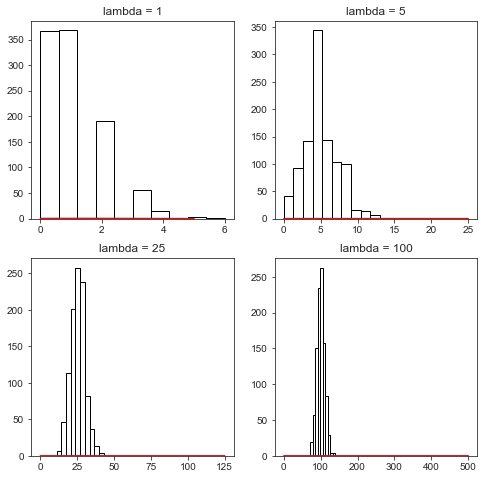

In [14]:
nrows = 2
pyplot.figure(figsize=(8, 8))

for i in range(len(lambdas)):
  pyplot.subplot(len(lambdas) / nrows, nrows, i+1, 
                 title='lambda = %d' % lambdas[i])

  x_norm = numpy.linspace(0, 5*lambdas[i], resolution)
  y_norm = scipy.stats.norm.pdf(
      x_norm, # Where we want to evaluate the PDF
      loc=lambdas[i], # The mean of the distribution
      scale=numpy.sqrt(lambdas[i])) # The std deviation of the distribution

  # Plot the samples
  pyplot.hist(poisson_samples[i], 
              color='white', edgecolor='black')
  # Plot the normal distribution PDF
  pyplot.plot(x_norm, y_norm, color='red')

## Continuous Distributions

Continuous distributions are used to model variables with continuous valued random variables. Physical measurements, such as weight, length and temperature are examples of variables with continuous variables. 

Continuous distributions have an infinite number of possible outcomes. The distribution measures the probability for some range of values. We therefore call the distribution function the **Probability Density Function**. This is in contrast to the probability mass function for discrete distributions. 

The probability of a value being in the range $\{X_1, X_2 \}$ can be written as the integral of the probability density function over that range. 

$$P({X_1, X_2}) = \int_{X_1}^{X_2} P(x) dx $$

Notice that for a single exact value $X_1 = X_2$, and $P({X_1, X_2}) = 0.$

Properties of continuous distributions are:

- The area under the distribution curve must be equal to 1, integrated over the range of possible values.
- The probability of a range of values of an event equals the **area** under the density curve over that range of values.
- Probabilities cannot have negative values.
- The probability of any single, exact value is 0.


### Uniform Distribution

A uniform distribution has flat probability between limits $\{ a, b \}$ and $0$ outside that interval. The uniform distribution is used in a number of applications, including random selection of data and in simulation.

We can write the probability of the the uniform distribution as:

$$
P(x\ | \{a,b \}) = \Bigg\{ 
\begin{matrix}
\frac{1}{(b - a)}\ if\ a \le x \le b\\
0\ if\ x \lt a\ or\ x\ \gt b
\end{matrix}
$$

The uniform distribution has the following 

$$
Mean = \frac{(a + b)}{2}\\
Variance = \frac{1}{2}(b - a)^2
$$

The code in the cell below computes and plots the uniform distribution on the interval $\{ 0, 1 \}$, along with the kernel density plot. Execute this code and examine the result. 

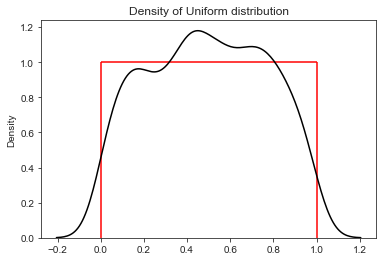

In [15]:
uniform_samples = numpy.random.uniform(0, 1, n)

# Plot the distribution of samples
seaborn.kdeplot(uniform_samples, color='black')

# Draw the uniform PDF
pyplot.vlines(0, 0, 1, colors='red')
pyplot.hlines(1, 0, 1, colors='red')
pyplot.vlines(1, 0, 1, colors='red')

_ = pyplot.title('Density of Uniform distribution')

Let's try simulating some uniform distributions. The code in the cell below creates and plots the histogram uniform distributions with $\{100, 1000, 10000, 100000\}$ realizations, along with the theoretical density. Execute this code and examine the results. Notice how close each histogram is to the theoretical density. 

<ipython-input-16-bfc91ec8e2ea>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  pyplot.subplot(


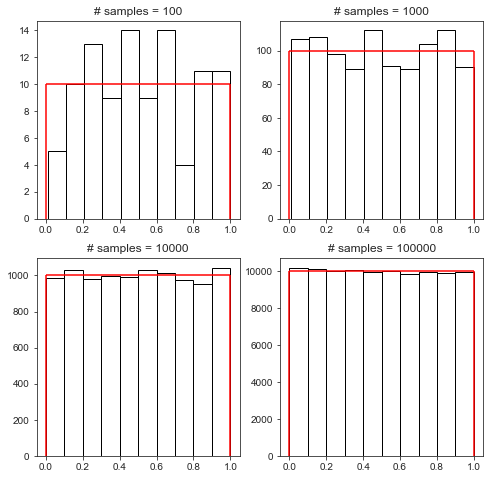

In [16]:
trials = [100, 1000, 10000, 100000]

nrows = 2
pyplot.figure(figsize=(8, 8))
nbins = 10  # how many bins to use for each histogram
for i in range(len(trials)):
  pyplot.subplot(
      len(trials) / nrows, nrows, i+1, 
      title='# samples = %d' % trials[i]) 

  h = trials[i] / nbins
  pyplot.vlines(0, 0, h, colors='red')
  pyplot.hlines(h, 0, 1, colors='red')
  pyplot.vlines(1, 0, h, colors='red')  
  
  # Plot the samples
  pyplot.hist(numpy.random.uniform(0, 1, trials[i]), 
              bins=nbins, color='white', edgecolor='black')


### Normal Distribution

The normal distribution is one of the most widely used probability distributions. Any case where values are the result of product of a large number of processes will converge to a normal distribution. Many physical processes produce measurement values which are well modeled by a normal distribution or log-normal distribution.

For a normal distribution we can write the density function as:

$$P(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\frac{-(x - \mu)^2}{2 \sigma^2}}$$

The parameters can be interpreted as:

$$
\mu = location\ parameter\ = mean\\
\sigma = scale = standard\ deviation
$$

In other words, the location parameter sets the center of the distribution. The scale determines spread or width of the distribution.

The code in the cell below computes and plots the normal distribution for four different combinations of location and scale, as shown in the table:

| $\mu$ | $\sigma$ |
|:-----:|:-------:|
| 0     | 1       |
| 5     | 1       |
| 0     | 0.1     |
| 4     | 4       |

Execute this code and examine the results. Notice how the center of the distribution changes with the scale and the width of the distribution changes with the scale.    

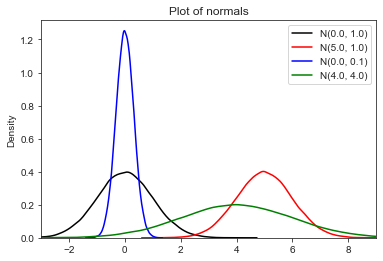

In [17]:
n = 100000

norm_params = [
    # (mean, var)
    (0, 1),
    (5, 1),
    (0, .1),
    (4, 4)
]

norm_samples = [numpy.random.normal(mean, numpy.sqrt(var), n)
                for mean, var in norm_params]

pyplot.title('Plot of normals')
colors = ('black', 'red', 'blue', 'green')
for i, samples in enumerate(norm_samples):
  seaborn.kdeplot(samples, color=colors[i], 
                  label='N(%.1f, %.1f)' % norm_params[i])
pyplot.xlim(-3, 9)
_ = pyplot.legend()

We have now explored the basic properties of the normal distribution. The relationship between the the quantiles and the number of $\sigma$s to the left or right of center is another important property of the normal distribution. An understanding of this relationship provides some intuition about the likelihood of events under the normal distribution.

The code in the cell below plots a histogram of 100000 realizations of a standard normal distribution ($\mu = 0.0,\ \sigma = 1$). Vertical lines are plotted at $\sigma = \{-3, -2, -1,\ 0,\ 1,\ 2,\ 3\}$. Execute this code and examine the results. Notice that events become quite unlikely as $\sigma$ becomes large.

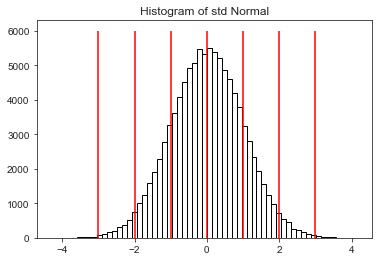

In [3]:
n = 100000

std_norm_samples = numpy.random.standard_normal(n)

pyplot.title('Histogram of std Normal')
pyplot.hist(std_norm_samples, bins=61, color='white', edgecolor='black')
# Draw lines at each standard deviation from the mean
pyplot.vlines(range(-3, 4), 0, 6000, color='red')

In [4]:
std_thresholds = range(-3, 4)
quantiles = scipy.stats.norm.cdf(std_thresholds, scale=1, loc=0)
pandas.DataFrame({
    'std deviations': std_thresholds,
    'quantile': quantiles,
})

,std deviations,quantile
0,-3,0.001350
1,-2,0.022750
2,-1,0.158655
3,0,0.500000
4,1,0.841345
5,2,0.977250
6,3,0.998650


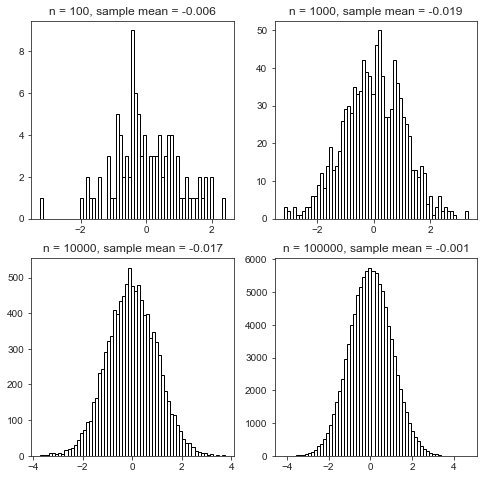

In [20]:
pyplot.figure(figsize=(8, 8))

for i, n in enumerate([100, 1000, 10000, 100000]):
  std_norm_samples = numpy.random.standard_normal(n)
  title = 'n = %d, sample mean = %.3f' % (n, std_norm_samples.mean())
  pyplot.subplot(2, 2, i+1, title=title) 
  pyplot.hist(std_norm_samples, bins=61, color='white', edgecolor='black')

### Log-Normal Distribution

The normal distribution is defined for continuous random variables in the range $-\infty \le x \le \infty$. However, many quantities one can measure are only defined in a range $0 \lt x \le \infty$. Examples include, price, weight, length, and volume. 



Text(0.5, 1.0, 'Density of std Log-Normal')

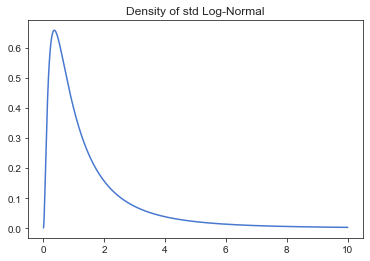

In [5]:
x = numpy.linspace(.01, 10, num=100000)
log_normal_pdf = scipy.stats.lognorm.pdf(x, 1)
pyplot.plot(x, log_normal_pdf)
pyplot.title('Density of std Log-Normal')

## Your Turn 3
The log-normal distribution is on log scale. You can transform the log-normal distribution to a normal distribution. In the cell below create and execute the code to **natural log transform the x variable** and plot the density. 

How does this result compare to a standard normal distribution?

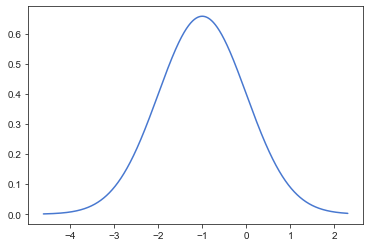

In [6]:
pyplot.plot(numpy.log(x), log_normal_pdf)

### Student t-distribution

The student t-distribution is often just referred to as the t-distribution. This distribution is of importance in statistics since the error in the difference of the means of normally distributed variables are t-distributed. 

The t-distribution is defined in a somewhat different way from the other distributions we have looked at. It has one parameter, the degrees of freedom, denoted as $\nu$. The derivation of the density function for the t-distribution is a bit complicated and leads to the following, rather complex result:

$$
P(x\ |\ \nu) = \frac{\Gamma(\frac{\nu + 1}{2})}{\sqrt{\nu \pi} \Gamma(\frac{\nu}{2})} \bigg(1 + \frac{x^2}{\nu} \bigg)^{- \frac{\nu + 1}{2}}\\
where\\
\Gamma(x) = Gamma\ function
$$

Despite the complex density formula, you can gain a fair feel for the behavior of the t-distribution by plotting it for several values of $\nu$ and comparing it to the normal distribution. The code in the cell below plots the density function for the t-distribution for degrees of freedom, $\nu = \{1, 2, 3, \infty \}$, along with a standard normal distribution. Execute this code and examine the results. Notice how the t-distribution is wider with heavier tails than the normal distribution. As $\nu \rightarrow \infty$ the t-distribution becomes identical to the normal distribution. 

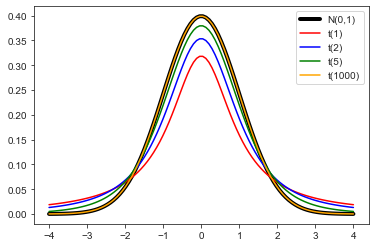

In [7]:
x = numpy.linspace(-4, 4, num=100)

# Plot the normal distribution PDF
pyplot.plot(x, scipy.stats.norm.pdf(x), color='black', linewidth=4, label='N(0,1)')

for df, color in zip([1, 2, 5, 1000], ['red', 'blue', 'green', 'orange']):  
  pyplot.plot(x, scipy.stats.t.pdf(x, df), label='t(%d)' % df, color=color)
_ = pyplot.legend()

## Gamma and Exponential Distributions

The gamma distributions are a complex family of continuous probability distributions. All distributions in the gamma family are only defined for $0 \ge x \ge \infty$.

We will look at one special cases of particular interest, the exponential distribution. The exponential distribution is used to model waiting times between events. We can write the formula for the probability density function of the exponential distribution as:

$$P(x; \lambda) = \bigg\{ 
\begin{matrix}
\lambda \exp^{- \lambda x}\ if\ x \ge 0\\
0\ if\ x \lt 0
\end{matrix}\\
\\
where\\
Average\ arrival\ rate\ = Expected\ value\ = E[X] = \frac{1}{\lambda}\\
Var[X] = \frac{1}{\lambda^2}
$$

Notice also that:

$$average\ time\ between\ events = \lambda = \frac{1}{average\ arrival\ rate}$$

To get a feel for the exponential distribution, let's plot it for arrival rates of $\{0.5, 1.0, 2.0  \}$ or $\lambda = \{ 2.0, 1.0, 0.5 \}$. Execute the code in the cell below to create the plot. Notice how the density function changes with $\lambda$.

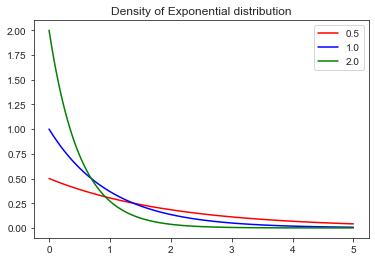

In [8]:
x = numpy.linspace(0, 5, num=100)
lambdas = [.5, 1., 2.]
colors = ['red', 'blue', 'green']

for i in range(len(lambdas)):
  pyplot.plot(x, scipy.stats.expon.pdf(
      x, loc=0, scale=1/lambdas[i]), color=colors[i], label=lambdas[i])
  
pyplot.legend()
_ = pyplot.title('Density of Exponential distribution')

### Exponential Distributions

You may have noticed that several of the distributions we have discussed use exponential functions to compute the probabilities. We call this family of probability distributions the exponential family. 

## Summary

In this notebook you have explored the properties of certain discrete and continuous probability distributions. We can summarize the properties of these distributions as follows:

1. Discrete distributions
 - Discrete distributions are used to model the probability of events with discrete outcomes or states. 
 - We call the distribution function the **Probability Mass Function**.
 - The sum of the probabilities of all possible events must equal 1.
 - The probability of an event is equal to the value of the distribution at that point.
 - All probabilities are strictly in the range 0-1.
2. Continuous distributions
 - Continuous distributions have an infinite number of possible outcomes. The distribution measures the probability for some range of values. 
 - We call the distribution function the **Probability Density Function**. 
 - The probability of a range of values of an event equals the **area** under density curve over that range of values.
 - Probabilities cannot have negative values.
 - The probability of any single, exact value is 0.

<div id="reminder" style="border-radius: 5px; background-color:#f5f5f5;" >
<h3>Reminder</h3>
<p>Use this notebook to answer the quiz questions related to the <b>Your Turn</b> sections.<p>
</div>